In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Data preprroceessing

In [2]:
data = pd.read_csv('data/train_dataset_train.csv', sep=',')

In [3]:
data.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [4]:
data['ticket_type_nm'] = data['ticket_type_nm'].apply(lambda x: x.lower())
tickets = data.ticket_type_nm.unique()
#tickets

In [5]:
data['type_tk'] = data['ticket_type_nm'].apply(lambda x: 1 if 'тк' in x else 0)

In [6]:
ticket_map = {
    'school': [t for t in tickets if 'учащегося' in t],
    'student': [t for t in tickets if 'студент' in t],
    'aspirant': [t for t in tickets if 'аспирант' in t],
    'ordinator': [t for t in tickets if 'ординатор' in t],
    'assistent': [t for t in tickets if 'ассистент' in t],
    'facepay': [t for t in tickets if 'пропуск facepay' in t],
    'druzhinnik': [t for t in tickets if 'дружинник' in t],
    'prigorod': [t for t in tickets if 'пригород' in t],
    'edinyi': [t for t in tickets if 'единый' in t],
    'social': [t for t in tickets if 'социальн' in t or 'весб' in t],
    'worker': [t for t in tickets if 'метро' in t or 'сотрудник' in t],
    'regular': [t for t in tickets if 'кошелек' in t or 'временный' in t or 'влб' in t or 'ббк' in t or 'безнал' in t],
}
#ticket_map

In [7]:
def replace_type(text):
    for each_type, values in ticket_map.items():
        for value in values:
            if value in text:
                return each_type
    return text

In [8]:
data.ticket_type_nm = data.ticket_type_nm.apply(lambda x: replace_type(x))

In [9]:
data.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,type_tk
0,1,40BD89EC85646EFB69E283F39C298E60,facepay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,0
1,2,126727A96489CC976A8C08E5CEB00542,school,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,0
2,3,D28CE6A9E0E5B6D213470A97CFF32485,druzhinnik,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,0
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022,0
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,regular,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017,0


In [10]:
data = data.assign(pass_datetime = pd.to_datetime(data['pass_dttm']))
data = data.assign(
    weekday = data['pass_datetime'].dt.weekday,
    hour = data['pass_datetime'].dt.hour
)

In [11]:
data.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,type_tk,pass_datetime,weekday,hour
0,1,40BD89EC85646EFB69E283F39C298E60,facepay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,0,2022-09-12 05:00:13,0,5
1,2,126727A96489CC976A8C08E5CEB00542,school,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,0,2022-09-12 05:00:54,0,5
2,3,D28CE6A9E0E5B6D213470A97CFF32485,druzhinnik,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,0,2022-09-12 05:00:55,0,5
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022,0,2022-09-12 05:01:13,0,5
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,regular,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017,0,2022-09-12 05:02:55,0,5


In [12]:
#data['ticket_type_nm'].value_counts()

In [13]:
regular_tickets = ['student', 'school', 'ordinator', 'aspirant', 'regular', '30 дней', '90 дней']
data = data.assign(
    ticket_regular = data['ticket_type_nm'].isin(regular_tickets).astype(int)
)

In [14]:
data.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,type_tk,pass_datetime,weekday,hour,ticket_regular
0,1,40BD89EC85646EFB69E283F39C298E60,facepay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,0,2022-09-12 05:00:13,0,5,0
1,2,126727A96489CC976A8C08E5CEB00542,school,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,0,2022-09-12 05:00:54,0,5,1
2,3,D28CE6A9E0E5B6D213470A97CFF32485,druzhinnik,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,0,2022-09-12 05:00:55,0,5,0
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022,0,2022-09-12 05:01:13,0,5,1
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,regular,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017,0,2022-09-12 05:02:55,0,5,1


In [15]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [16]:
data_ttype = onehotencoder.fit_transform(data[['ticket_type_nm']])
data_ttype = pd.DataFrame(data_ttype.toarray(), columns=onehotencoder.categories_[0])

In [17]:
data_new = pd.concat([data, data_ttype], axis=1)
data_new = data_new.drop('ticket_type_nm', axis=1)
data_new

,id,ticket_id,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,...,druzhinnik,edinyi,facepay,ordinator,prigorod,regular,school,social,student,worker
0,1,40BD89EC85646EFB69E283F39C298E60,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,126727A96489CC976A8C08E5CEB00542,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,D28CE6A9E0E5B6D213470A97CFF32485,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091016,1091017,6A738232F8E43DFCD4027FDC0EA6CC03,2283,Нижегородская (второй),15005,Нижегородская,15,Некрасовская,2022-09-19 02:54:50,124.750000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1091017,1091018,141174B366F14A8703903813A49374DB,278,Калужская (Северный),6007,Калужская,6,Калужско-Рижская,2022-09-19 03:06:02,56.066667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1091018,1091019,E38493B30A7C55170806F187AF5EEA15,118,Каширская (Северный ),2010,Каширская,2,Замоскворецкая,2022-09-19 03:17:00,91.283333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1091019,1091020,3DF2B6366631ECA06274DD2CB5B0DF24,2452,Воронцовская (Первый),11014,Воронцовская,11,Большая кольцевая,2022-09-19 03:23:30,47.900000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data_duration = pd.read_csv('data/duration.csv')
data_duration.rename(columns={'start_station_id': 'station_id'}, inplace=True)
data_duration.head()

,station_id,route_dur
0,1001,24.790
1,1002,36.190
2,1003,30.090
3,1004,27.255
4,1005,28.760


In [19]:
data_new = data_new.merge(data_duration, on='station_id', how='left')

In [20]:
data_new

,id,ticket_id,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,...,edinyi,facepay,ordinator,prigorod,regular,school,social,student,worker,route_dur
0,1,40BD89EC85646EFB69E283F39C298E60,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.000
1,2,126727A96489CC976A8C08E5CEB00542,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,32.000
2,3,D28CE6A9E0E5B6D213470A97CFF32485,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.000
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.000
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091016,1091017,6A738232F8E43DFCD4027FDC0EA6CC03,2283,Нижегородская (второй),15005,Нижегородская,15,Некрасовская,2022-09-19 02:54:50,124.750000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.500
1091017,1091018,141174B366F14A8703903813A49374DB,278,Калужская (Северный),6007,Калужская,6,Калужско-Рижская,2022-09-19 03:06:02,56.066667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.720
1091018,1091019,E38493B30A7C55170806F187AF5EEA15,118,Каширская (Северный ),2010,Каширская,2,Замоскворецкая,2022-09-19 03:17:00,91.283333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.685
1091019,1091020,3DF2B6366631ECA06274DD2CB5B0DF24,2452,Воронцовская (Первый),11014,Воронцовская,11,Большая кольцевая,2022-09-19 03:23:30,47.900000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.705


In [21]:
data_new.to_csv('data/train_dataset_new.csv', index=False)

## Model

In [22]:
col_type = data_ttype.columns.to_list()

In [23]:
columns_set_1 = ['entrance_id', 'station_id', 'line_id', 'weekday', 'hour', 'ticket_regular']
columns_set_2 = ['entrance_id', 'station_id', 'line_id', 'weekday', 'hour', 'ticket_regular', 'type_tk', 'route_dur']+col_type

In [24]:
X = data_new[columns_set_2]
y = data['time_to_under']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1 Linear Regression

In [26]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred_lr = model_lr.predict(X_test)

In [28]:
r2_score(y_test, y_pred_lr)

0.4913690284800919

### 2 Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor()

In [31]:
%time
rf.fit(X_train, y_train)

Wall time: 0 ns


RandomForestRegressor()

In [32]:
y_pred_rf = rf.predict(X_test)

In [33]:
r2_score(y_test, y_pred_rf)

0.45742225921112545

In [34]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3 XGBoost

In [35]:
import xgboost as xgb

In [36]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [37]:
y_pred_xgb = model_xgb.predict(X_test)

In [38]:
r2_score(y_test, y_pred_xgb)

0.5294822724969226

In [39]:
# 0.528930515662034
# 0.5291563176246329 - add tk
# 0.5294822724969226 - add medium duration

### Interpretation of xgb

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

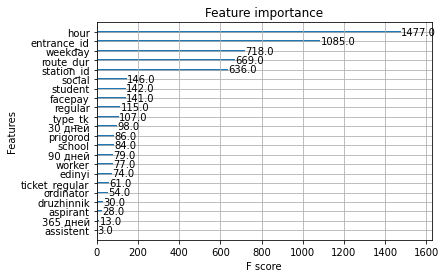

In [40]:
xgb.plot_importance(model_xgb)

### 4 Catboost

In [41]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [42]:
cat.fit(X_train,y_train)

Learning rate set to 0.116865
0:	learn: 220.1044452	total: 265ms	remaining: 4m 24s
1:	learn: 209.6342039	total: 445ms	remaining: 3m 41s
2:	learn: 200.9150347	total: 638ms	remaining: 3m 32s
3:	learn: 193.6458335	total: 771ms	remaining: 3m 12s
4:	learn: 187.7007610	total: 891ms	remaining: 2m 57s
5:	learn: 182.9154027	total: 1.05s	remaining: 2m 54s
6:	learn: 179.1195536	total: 1.21s	remaining: 2m 52s
7:	learn: 175.8288161	total: 1.35s	remaining: 2m 47s
8:	learn: 173.3173818	total: 1.49s	remaining: 2m 43s
9:	learn: 171.1544314	total: 1.61s	remaining: 2m 39s
10:	learn: 169.4260783	total: 1.78s	remaining: 2m 39s
11:	learn: 167.9852808	total: 2.04s	remaining: 2m 47s
12:	learn: 166.8375736	total: 2.17s	remaining: 2m 45s
13:	learn: 165.9248300	total: 2.37s	remaining: 2m 46s
14:	learn: 165.1187666	total: 2.53s	remaining: 2m 46s
15:	learn: 164.4791161	total: 2.65s	remaining: 2m 43s
16:	learn: 163.9345944	total: 2.83s	remaining: 2m 43s
17:	learn: 163.4932465	total: 3.01s	remaining: 2m 44s
18:	lear

154:	learn: 159.6237750	total: 20.1s	remaining: 1m 49s
155:	learn: 159.6194704	total: 20.2s	remaining: 1m 49s
156:	learn: 159.6159880	total: 20.3s	remaining: 1m 49s
157:	learn: 159.6111345	total: 20.4s	remaining: 1m 48s
158:	learn: 159.6064375	total: 20.5s	remaining: 1m 48s
159:	learn: 159.6017312	total: 20.6s	remaining: 1m 48s
160:	learn: 159.5979771	total: 20.8s	remaining: 1m 48s
161:	learn: 159.5933474	total: 21s	remaining: 1m 48s
162:	learn: 159.5903052	total: 21.1s	remaining: 1m 48s
163:	learn: 159.5858432	total: 21.3s	remaining: 1m 48s
164:	learn: 159.5798921	total: 21.4s	remaining: 1m 48s
165:	learn: 159.5761294	total: 21.5s	remaining: 1m 47s
166:	learn: 159.5722724	total: 21.6s	remaining: 1m 47s
167:	learn: 159.5685623	total: 21.7s	remaining: 1m 47s
168:	learn: 159.5646678	total: 21.9s	remaining: 1m 47s
169:	learn: 159.5603646	total: 22s	remaining: 1m 47s
170:	learn: 159.5561900	total: 22.1s	remaining: 1m 46s
171:	learn: 159.5540602	total: 22.2s	remaining: 1m 46s
172:	learn: 15

304:	learn: 159.1722289	total: 37.9s	remaining: 1m 26s
305:	learn: 159.1702642	total: 38s	remaining: 1m 26s
306:	learn: 159.1681154	total: 38.1s	remaining: 1m 26s
307:	learn: 159.1656361	total: 38.3s	remaining: 1m 26s
308:	learn: 159.1626959	total: 38.4s	remaining: 1m 25s
309:	learn: 159.1598757	total: 38.5s	remaining: 1m 25s
310:	learn: 159.1571307	total: 38.6s	remaining: 1m 25s
311:	learn: 159.1543126	total: 38.7s	remaining: 1m 25s
312:	learn: 159.1527513	total: 38.8s	remaining: 1m 25s
313:	learn: 159.1509372	total: 39s	remaining: 1m 25s
314:	learn: 159.1496722	total: 39.1s	remaining: 1m 24s
315:	learn: 159.1462909	total: 39.2s	remaining: 1m 24s
316:	learn: 159.1429816	total: 39.3s	remaining: 1m 24s
317:	learn: 159.1413392	total: 39.4s	remaining: 1m 24s
318:	learn: 159.1394441	total: 39.5s	remaining: 1m 24s
319:	learn: 159.1370691	total: 39.6s	remaining: 1m 24s
320:	learn: 159.1345761	total: 39.7s	remaining: 1m 24s
321:	learn: 159.1325471	total: 39.8s	remaining: 1m 23s
322:	learn: 15

454:	learn: 158.8794551	total: 56s	remaining: 1m 7s
455:	learn: 158.8782824	total: 56.2s	remaining: 1m 6s
456:	learn: 158.8769808	total: 56.3s	remaining: 1m 6s
457:	learn: 158.8763410	total: 56.4s	remaining: 1m 6s
458:	learn: 158.8744982	total: 56.5s	remaining: 1m 6s
459:	learn: 158.8728147	total: 56.6s	remaining: 1m 6s
460:	learn: 158.8714051	total: 56.7s	remaining: 1m 6s
461:	learn: 158.8700839	total: 56.8s	remaining: 1m 6s
462:	learn: 158.8685366	total: 56.9s	remaining: 1m 6s
463:	learn: 158.8668075	total: 57.1s	remaining: 1m 5s
464:	learn: 158.8639295	total: 57.2s	remaining: 1m 5s
465:	learn: 158.8622269	total: 57.3s	remaining: 1m 5s
466:	learn: 158.8607497	total: 57.4s	remaining: 1m 5s
467:	learn: 158.8591388	total: 57.5s	remaining: 1m 5s
468:	learn: 158.8575746	total: 57.6s	remaining: 1m 5s
469:	learn: 158.8555416	total: 57.8s	remaining: 1m 5s
470:	learn: 158.8539738	total: 57.9s	remaining: 1m 4s
471:	learn: 158.8524321	total: 58s	remaining: 1m 4s
472:	learn: 158.8511503	total: 5

608:	learn: 158.6481394	total: 1m 14s	remaining: 47.7s
609:	learn: 158.6462151	total: 1m 14s	remaining: 47.6s
610:	learn: 158.6445400	total: 1m 14s	remaining: 47.5s
611:	learn: 158.6433724	total: 1m 14s	remaining: 47.3s
612:	learn: 158.6420455	total: 1m 14s	remaining: 47.2s
613:	learn: 158.6394940	total: 1m 14s	remaining: 47.1s
614:	learn: 158.6380709	total: 1m 15s	remaining: 47s
615:	learn: 158.6368665	total: 1m 15s	remaining: 46.9s
616:	learn: 158.6349189	total: 1m 15s	remaining: 46.8s
617:	learn: 158.6334610	total: 1m 15s	remaining: 46.6s
618:	learn: 158.6317895	total: 1m 15s	remaining: 46.6s
619:	learn: 158.6315096	total: 1m 15s	remaining: 46.5s
620:	learn: 158.6304771	total: 1m 15s	remaining: 46.3s
621:	learn: 158.6300304	total: 1m 16s	remaining: 46.2s
622:	learn: 158.6289893	total: 1m 16s	remaining: 46.1s
623:	learn: 158.6275750	total: 1m 16s	remaining: 46s
624:	learn: 158.6264838	total: 1m 16s	remaining: 45.9s
625:	learn: 158.6249383	total: 1m 16s	remaining: 45.8s
626:	learn: 15

758:	learn: 158.4549828	total: 1m 32s	remaining: 29.4s
759:	learn: 158.4540938	total: 1m 32s	remaining: 29.2s
760:	learn: 158.4528903	total: 1m 32s	remaining: 29.1s
761:	learn: 158.4523316	total: 1m 32s	remaining: 29s
762:	learn: 158.4507858	total: 1m 32s	remaining: 28.9s
763:	learn: 158.4498063	total: 1m 33s	remaining: 28.7s
764:	learn: 158.4482397	total: 1m 33s	remaining: 28.6s
765:	learn: 158.4466007	total: 1m 33s	remaining: 28.5s
766:	learn: 158.4453373	total: 1m 33s	remaining: 28.4s
767:	learn: 158.4437970	total: 1m 33s	remaining: 28.3s
768:	learn: 158.4424862	total: 1m 33s	remaining: 28.1s
769:	learn: 158.4407882	total: 1m 33s	remaining: 28s
770:	learn: 158.4393725	total: 1m 33s	remaining: 27.9s
771:	learn: 158.4378959	total: 1m 33s	remaining: 27.8s
772:	learn: 158.4373346	total: 1m 34s	remaining: 27.6s
773:	learn: 158.4362021	total: 1m 34s	remaining: 27.5s
774:	learn: 158.4353016	total: 1m 34s	remaining: 27.4s
775:	learn: 158.4347194	total: 1m 34s	remaining: 27.2s
776:	learn: 15

908:	learn: 158.2812125	total: 1m 50s	remaining: 11.1s
909:	learn: 158.2800921	total: 1m 50s	remaining: 11s
910:	learn: 158.2797420	total: 1m 50s	remaining: 10.8s
911:	learn: 158.2782398	total: 1m 50s	remaining: 10.7s
912:	learn: 158.2760364	total: 1m 51s	remaining: 10.6s
913:	learn: 158.2753436	total: 1m 51s	remaining: 10.5s
914:	learn: 158.2739063	total: 1m 51s	remaining: 10.3s
915:	learn: 158.2725578	total: 1m 51s	remaining: 10.2s
916:	learn: 158.2713282	total: 1m 51s	remaining: 10.1s
917:	learn: 158.2708556	total: 1m 51s	remaining: 9.97s
918:	learn: 158.2698027	total: 1m 51s	remaining: 9.85s
919:	learn: 158.2685730	total: 1m 51s	remaining: 9.73s
920:	learn: 158.2676550	total: 1m 52s	remaining: 9.61s
921:	learn: 158.2667089	total: 1m 52s	remaining: 9.49s
922:	learn: 158.2658752	total: 1m 52s	remaining: 9.37s
923:	learn: 158.2646467	total: 1m 52s	remaining: 9.25s
924:	learn: 158.2636014	total: 1m 52s	remaining: 9.13s
925:	learn: 158.2619299	total: 1m 52s	remaining: 9.01s
926:	learn: 

In [43]:
y_pred_cat = cat.predict(X_test)

In [44]:
r2_score(y_test, y_pred_cat)

0.5297960086437499

In [45]:
# 0.5293888249242376